***
<h1 id="heading"><center><span style="background-color:#5642C5; color:white ; display:fill;border-radius:5px; font-family:cursive"> Structural Defects Detection 🔎🕳🧱⛏️</span></center><a class="anchor-link" href="">¶</a></h1>
<p><center style="color:#159364; font-family:cursive;">"Excel as a Data Scientist by mastering a range of skills while developing expertise in a specific domain. A diverse skill set allows you to understand every aspect of a project, while mastery in your chosen area empowers you to make impactful contributions.</center></p>

***


<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;">💬 From the start, I would like to take this opportunity to remind everyone to be <code>kind</code>, <code>just</code> and <code>mindful</code>😃</p></blockquote>

<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946; display:fill;border-radius:5px; font-family:cursive"> 👨‍💻 Description of the Problem</span></h3>

* Describe the problem ahead
* Describe the datasets and why you chose it and how it will solve the problem above.
*


 __Source:__
 [Structural Defects Detection Dataset](https://www.kaggle.com/datasets/aniruddhsharma/structural-defects-network-concrete-crack-images?datasetId=804181&sortBy=voteCount)


 __Context:__
SDNET2018 is an annotated image dataset for training, validation, and benchmarking of artificial intelligence-based crack detection algorithms for concrete. SDNET2018 contains over 56,000 images of cracked and non-cracked concrete bridge decks, walls, and pavements. The dataset includes cracks as narrow as 0.06 mm and as wide as 25 mm. The dataset also includes images with a variety of obstructions, including shadows, surface roughness, scaling, edges, holes, and background debris. SDNET2018 will be useful for the continued development of concrete crack detection algorithms based on deep learning convolutional neural networks, which are a subject of continued research in the field of structural health monitoring.

 __Acknowledgements:__
Utah State University Campus, Logan, Utah, USA

 __Objective:__
In this project we try to analyse the dataset provided above, and we try to make some classification task for the type of each date fruit depend on the features provided in the data.


<h2 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> 1. 📥 Import packages & data </span></h2>

<h3 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">📦 Packages </span></h3>


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import os
from PIL import Image


import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")

<h3 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🗃 Dataset </span></h3>


Extract data from __kaggle__

# New Section

In [ ]:
!pip install kaggle

In [ ]:
                                                                                                                                                                                                                                                                    from google.colab import files
files.upload()  # Upload the Kaggle API token JSON file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
import kaggle

In [ ]:
!kaggle datasets download -d aniruddhsharma/structural-defects-network-concrete-crack-images

 99% 498M/506M [00:10<00:00, 99.0MB/s]
100% 506M/506M [00:10<00:00, 49.9MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/structural-defects-network-concrete-crack-images.zip', 'r') as zip_ref:
    zip_ref.extractall('data')  # Extract to a folder named 'data'

<h2 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">⚙️ Load and Preprocess the Dataset: </span></h2>


In [ ]:
# !pip install Pillow

Let see the data image using Pillow

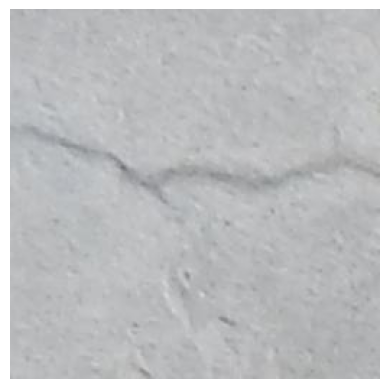

In [ ]:
# Path to the directory containing your images
image_directory = '/content/data/Decks/Cracked'

# List all image files in the directory
image_files = os.listdir(image_directory)

# Load and display the first image
image_path = os.path.join(image_directory, image_files[0])
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axes for cleaner display
plt.show()


If you want to use the opencv to view the image, unhide the following code!!

<pre>
<font color="green">from</font> sklearn.model_selection <font color="green">import</font> train_test_split
<font color="green">import</font> cv2
<font color="green">from</font> google.colab.patches <font color="green">import</font> cv2_imshow
<font color="green">import</font> os

<font color="green"># Path to the directory containing your images</font>
image_directory = '/content/data/Decks/Cracked'
<font color="green"># List all image files in the directory</font>
image_files = os.listdir(image_directory)

<font color="green"># Load and display the first image using OpenCV</font>
image_path = os.path.join(image_directory, image_files[0])
image = cv2.imread(image_path)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
</pre>


In [ ]:
# @title
import cv2
from google.colab.patches import cv2_imshow
import os

# Path to the directory containing your images
image_directory = '/content/data/Decks/Cracked'

# List all image files in the directory
image_files = os.listdir(image_directory)

# Load and display the first image using OpenCV
image_path = os.path.join(image_directory, image_files[0])
image = cv2.imread(image_path)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Now let try to extract the data we want use.

In [ ]:
# Define the paths to your dataset directories
deck_cracked_dir = "/content/data/Decks/Cracked"
deck_non_cracked_dir = "/content/data/Decks/Non-cracked"
# pavement_cracked_dir = "/content/data/Pavements/Cracked"
# pavement_non_cracked_dir = "/content/data/Pavements/Non-cracked"
# wall_cracked_dir = "/content/data/Walls/Cracked"
# wall_non_cracked_dir = "/content/data/Walls/Non-cracked"

# Function to load and preprocess images
def load_and_preprocess_images(image_dir, target_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg"):
            image_path = os.path.join(image_dir, filename)
            image = Image.open(image_path)
            image = image.resize(target_size)  # Resize to target size
            image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
            images.append(image)
            labels.append(1 if "cracked" in image_dir else 0)  # Assign labels
    return np.array(images), np.array(labels)

# Load and preprocess images for cracked and non-cracked classes
deck_cracked_images, deck_cracked_labels = load_and_preprocess_images(deck_cracked_dir)
deck_non_cracked_images, deck_non_cracked_labels = load_and_preprocess_images(deck_non_cracked_dir)

# pavement_cracked_images, pavement_cracked_labels = load_and_preprocess_images(pavement_cracked_dir)
# pavement_non_cracked_images, pavement_non_cracked_labels = load_and_preprocess_images(pavement_non_cracked_dir)

# wall_cracked_images, wall_cracked_labels = load_and_preprocess_images(wall_cracked_dir)
# wall_non_cracked_images, wall_non_cracked_labels = load_and_preprocess_images(wall_non_cracked_dir)


# Combine images and labels for the entire dataset
all_images = np.concatenate((deck_cracked_images,
                             deck_non_cracked_images
                            #  ,pavement_cracked_images,
                            #  pavement_non_cracked_images,
                            #  wall_cracked_images,
                            #  wall_non_cracked_images
                             ),
                            axis=0)
all_labels = np.concatenate((deck_cracked_labels,
                             deck_non_cracked_labels
                            #  ,pavement_cracked_labels,
                            #  pavement_non_cracked_labels,
                            #  wall_cracked_labels,
                            #  wall_non_cracked_labels
                             ),
                            axis=0)

<h2 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🍽️ Prepare the Data for CNN: </span></h2>

To use the data we need to split the data into taining and test sets

In [ ]:
# Shuffle the dataset
indices = np.arange(all_images.shape[0])
np.random.shuffle(indices)
all_images = all_images[indices]
all_labels = all_labels[indices]

# Split the dataset into training, validation, and test sets
train_split = 0.7
val_split = 0.15
test_split = 0.15

num_samples = all_images.shape[0]
num_train = int(train_split * num_samples)
num_val = int(val_split * num_samples)

train_images = all_images[:num_train]
train_labels = all_labels[:num_train]
val_images = all_images[num_train:num_train + num_val]
val_labels = all_labels[num_train:num_train + num_val]
test_images = all_images[num_train + num_val:]
test_labels = all_labels[num_train + num_val:]

print("Dataset loaded and preprocessed.")
print("Number of training samples:", num_train)
print("Number of validation samples:", num_val)
print("Number of test samples:", num_samples - num_train - num_val)

Dataset loaded and preprocessed.
Number of training samples: 9534
Number of validation samples: 2043
Number of test samples: 2043


Also we can use a built in function in skeat-learn that can do the same that we did manually:
<pre>
<font color="green">from</font> sklearn.model_selection <font color="green">import</font> train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_images, all_labels, random_state = 1, test_size = 0.15)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=1, test_size=0.15)
</pre>

In [ ]:
train_images.shape, len(train_labels)

((9534, 64, 64, 3), 9534)

In [ ]:
label_serie = pd.Series(train_labels, dtype = "category")
label_serie

0       0
1       1
2       1
3       0
4       1
       ..
9529    1
9530    1
9531    1
9532    1
9533    1
Length: 9534, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
label_serie.value_counts()

1    8094
0    1440
dtype: int64

<h2 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🛠️🏗️ Build the CNN Model: </span></h2>

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=train_images.shape[1:]))
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(256, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))

model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)       

Also after we build the forwoad propagation of the CNN model, we need to define also how the backpropagation will go, and to do that we need to define the tree important compenents of the backpropagation:

__Loss function__ which we be will optimzed by using the __Optimizer__, and the __Metric__ to evaluate and musear how the model perform in this task.

In [ ]:
# Define the hyperparametres
learning_rate= 0.1

In [ ]:
# binary_crossentropy, sparse_categorical_crossentropy, categorical_crossentropy, hinge, kullback_leibler_divergence (for probability disro) --> as parametre in compile function
#
loss_f = "sparse_categorical_crossentropy"

# sgd, adam, rmsprop, adagrad, adadelta, nadam --> as parametre in compile function
#  SGD(), Adam(), RMSprop(),... --> if you want to change the hyperparameter of the optimzer
optimizer_f = "adam"

# accuracy, precision, recall, f1_score, AUC, cohen_kappa --> as parametre in compile function
metrics_list = ["accuracy"]

<h2 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">💻 Compile the Model: </span></h2>

In this section we combine all the compenent of the model forward and backward to be ready for training

In [ ]:
model.compile(loss=loss_f, optimizer=optimizer_f, metrics=metrics_list)

<h2 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🏋🏻‍♂️ Train the Model: </span></h2>

Now let train the model using the training and validation sets

In [ ]:
n_epcochs = 20

In [ ]:
model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs = n_epcochs)

Epoch 1/20
298/298 [==============================] - 112s 371ms/step - loss: 0.4492 - accuracy: 0.8490 - val_loss: 0.4612 - val_accuracy: 0.8634
Epoch 2/20
298/298 [==============================] - 85s 286ms/step - loss: 0.4288 - accuracy: 0.8490 - val_loss: 0.3935 - val_accuracy: 0.8639
Epoch 3/20
298/298 [==============================] - 84s 283ms/step - loss: 0.4289 - accuracy: 0.8490 - val_loss: 0.3967 - val_accuracy: 0.8639
Epoch 4/20
298/298 [==============================] - 83s 277ms/step - loss: 0.4287 - accuracy: 0.8490 - val_loss: 0.3981 - val_accuracy: 0.8639
Epoch 5/20
298/298 [==============================] - 86s 289ms/step - loss: 0.4296 - accuracy: 0.8490 - val_loss: 0.4070 - val_accuracy: 0.8639
Epoch 6/20
298/298 [==============================] - 84s 280ms/step - loss: 0.4267 - accuracy: 0.8490 - val_loss: 0.3992 - val_accuracy: 0.8639
Epoch 7/20
298/298 [==============================] - 81s 273ms/step - loss: 0.4347 - accuracy: 0.8490 - val_loss: 0.4016 - val_a

<h2 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">⚖️ Evaluate the Model: </span></h2>

In [28]:
validation_accuracy = model.evaluate(val_images, val_labels)
test_accuracy = model.evaluate(test_images,test_labels)

64/64 [==============================] - 4s 62ms/step - loss: 0.3979 - accuracy: 0.8639
The model performance on the validation set is:  0.863925576210022
64/64 [==============================] - 5s 79ms/step - loss: 0.4234 - accuracy: 0.8497
The model performance on the test set is:  0.8497307896614075


In [31]:
print("The model performance on the validation set is: ", validation_accuracy[1])
print("The model performance on the test set is: ", test_accuracy[1])

The model performance on the validation set is:  0.863925576210022
The model performance on the test set is:  0.8497307896614075


<h2 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🔧 Fine-Tune and Optimize: </span></h2>

<h2 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">💾🚀 Save and Deploy: </span></h2>

<div style="display:fill;
           border-radius:5px;
           background-color:#ffdbdb;;
           font-family:Georgia;">

<p style="padding: 6px;
          color:#aa0c0c;">
📌 Our target is try to find how those columns feature has impact of buying a bike or not.
</p>
</div>